In [1]:
%matplotlib inline

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
from typing import NamedTuple

In [18]:
beginning = """Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:"""

In [4]:
len(beginning)

248

In [5]:
import string

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
string.whitespace

' \t\n\r\x0b\x0c'

In [75]:
import math

In [111]:
def base_score(text, index):
    if 0 <= index < len(text):
        cur_char = text[index]
        next_char = text[index+1] if index + 1 < len(text) else " "
        prev_char = text[index-1] if index -1 > 0 else " "
        diff_to_center = abs((len(text)/ 2-1) - index) + 1
        if cur_char == "\n":
            return 16 / diff_to_center
        elif cur_char in string.whitespace and prev_char in "!?.":
            return 16 / diff_to_center
        elif cur_char in string.whitespace and prev_char in string.punctuation:
            return 8 / diff_to_center
        elif cur_char in string.whitespace:
            return 2 / diff_to_center
        else:
            return 1 / diff_to_center
    else:
        return -1
        

class PivotPoint(NamedTuple):
    split_at: int
    left_part_length: int
    right_part_length: int

    @property
    def total_length(self):
        return self.left_part_length + self.right_part_length


def pivot_point(text: str) -> PivotPoint:
    """Find a place to split string in about two. Preference order:
    1. Newlines (score 16)
    2. Punctuation that is immediately followed by whitespace (score 8)
    3. Other whitespace (score 2)
    4. Any other character (score 1)"""
    scores = [base_score(text, x[0]) for x in enumerate(text)]
    break_at = max([x for x in enumerate(scores)], key=lambda x: x[1])[0]
    return PivotPoint(break_at, len(text[:break_at+1]), len(text[break_at+1:]))

In [112]:
def clean_text(text: str) -> str:
    cleaned = text.replace("_", "")
    cleaned = cleaned.replace("--", "\u2014")
    cleaned = cleaned.replace("\s+", " ")
    cleaned = cleaned.replace("(\s\s+)", "\n")
    return cleaned

In [113]:
f = open("test/testtext")
utext = f.read()
f.close()
clean_ulysses = clean_text(utext)

In [114]:
clean_ulysses[:1000]

'\ufeffULYSSES\n\nby James Joyce\n\n\n\n\n— I —\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay crossed. A yellow dressinggown,\nungirdled, was sustained gently behind him on the mild morning air. He\nheld the bowl aloft and intoned:\n\n—Introibo ad altare Dei.\n\nHalted, he peered down the dark winding stairs and called out coarsely:\n\n—Come up, Kinch! Come up, you fearful jesuit!\n\nSolemnly he came forward and mounted the round gunrest. He faced about\nand blessed gravely thrice the tower, the surrounding land and the\nawaking mountains. Then, catching sight of Stephen Dedalus, he bent\ntowards him and made rapid crosses in the air, gurgling in his throat\nand shaking his head. Stephen Dedalus, displeased and sleepy, leaned\nhis arms on the top of the staircase and looked coldly at the shaking\ngurgling face that blessed him, equine in its length, and at the light\nuntonsured hair, grained and hued like pale oak.\

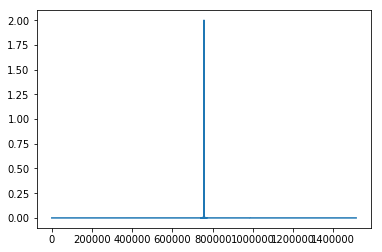

In [115]:
plot_text(clean_ulysses)

In [125]:
def recursive_split(text, max_length):
    if len(text) < max_length:
        return [text]
    else:
        pp = pivot_point(text)
        return recursive_split(text[:pp.split_at+1], max_length), recursive_split(text[pp.split_at+1:], max_length)

In [132]:
class TextNode(NamedTuple):
    start_index: int
    end_index: int
    left_tree: PivotPoint
    right_tree: PivotPoint
    max_length: int
    
    @property
    def is_split_needed(self):
        return (self.end_index + 1 - self.start_index) >= self.max_length
    

In [133]:
ulysses_root = TextNode(0, len(utext) -1,None,None,280)

In [134]:
ulysses_root.is_split_needed

True

In [126]:
recursive_split(clean_ulysses, 280)

(((((((((((((['\ufeffULYSSES\n\nby James Joyce\n\n\n\n\n— I —\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay crossed. A yellow dressinggown,\n'],
             ['ungirdled, was sustained gently behind him on the mild morning air. He\nheld the bowl aloft and intoned:\n\n—Introibo ad altare Dei.\n\nHalted, he peered down the dark winding stairs and ca']),
            (['lled out coarsely:\n\n—Come up, Kinch! Come up, you fearful jesuit!\n\nSolemnly he came forward and mounted the round gunrest. He faced about\nand blessed gravely thrice the tower, '],
             ['the surrounding land and the\nawaking mountains. Then, catching sight of Stephen Dedalus, he bent\ntowards him and made rapid crosses in the air, gurgling in his throat\nand shaking his head. '])),
           ((['Stephen Dedalus, displeased and sleepy, leaned\nhis arms on the top of the staircase and looked coldly at the shaking\ngurgling face that blessed h

In [110]:
pivot_point("timo")

PivotPoint(split_at=1, left_part_length=2, right_part_length=2)

In [104]:
"timo"[1:]

'imo'

In [93]:
def plot_text(text):
    scores = [base_score(text, x[0]) for x in enumerate(text)]
    plt.plot([x for x in range(len(scores))], scores)
    

In [94]:
def split_text(text):
    scores = [base_score(text, x[0]) for x in enumerate(text)]
    break_at = max([x for x in enumerate(scores)], key=lambda x: x[1])[0]
    return text[:break_at+1], text[break_at+1:]
    

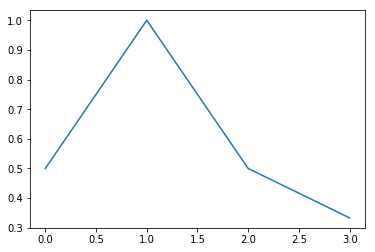

In [95]:
plot_text("timo")

In [97]:
split_text(beginning)

('Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. ',
 'A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:')

In [91]:
split_text("timo")

('ti', 'mo')

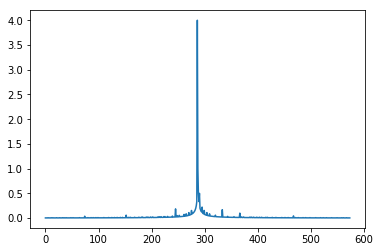

In [73]:
plot_text(lorem)

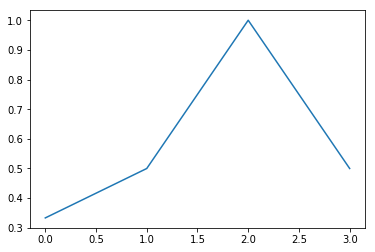

In [50]:
plot_text("timo")

In [51]:
lorem = """Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."""

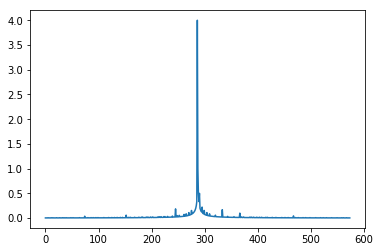

In [52]:
plot_text(lorem)

In [43]:
scores = [base_score(beginning, x[0]) for x in enumerate(beginning)]

In [46]:
labeled = [x for x in enumerate(scores)]

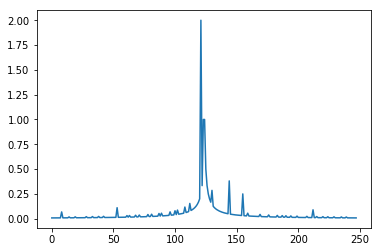

In [47]:
plt.plot([x for x in range(len(scores))], scores)

In [48]:
max(labeled, key=lambda x: x[1])

(121, 2.0)

In [40]:
beginning[:120+1] 

'Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed.'

In [41]:
beginning[121:]

' A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:'